In [9]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [10]:
from helpers import load_data

# load dataset
x, y = load_data()
print (x.shape, y.shape)

(50,) (50,)


In [1]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [12]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    train_indices=k_indices[[i for i in range(len(k_indices)) if i != k]]
    train_x,train_y=x[np.ravel(train_indices)],y[np.ravel(train_indices)]
    test_x,test_y=x[k_indices[k]],y[k_indices[k]]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    train_tx,test_tx=build_poly(train_x,degree),build_poly(test_x,degree)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    
    weight = ridge_regression(train_y,train_tx,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr=np.sqrt(2*compute_mse(train_y,train_tx,weight))
    loss_te=np.sqrt(2*compute_mse(test_y,test_tx,weight))
    return loss_tr, loss_te
cross_validation(y,x,build_k_indices(y,4,1),1,2,7)

(0.25239682200437014, 0.29575941445052489)

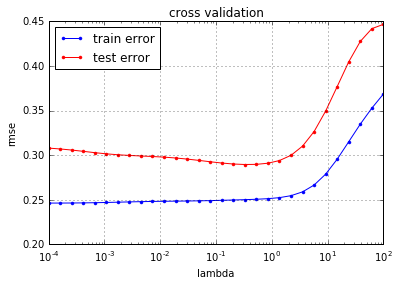

In [19]:
from plots import cross_validation_visualization



def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for lambda_ in lambdas:
        loss_tr=[]
        loss_te=[]
        for k in np.arange(k_fold):
            loss=cross_validation(y,x,k_indices,k,lambda_,degree)
            loss_tr.append(loss[0])
            loss_te.append(loss[1])
        rmse_tr.append(np.mean(loss_tr))
        rmse_te.append(np.mean(loss_te))
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    

cross_validation_demo()

In [20]:
def cross_validation_demo_different_degrees():
    seed = 1
    k_fold = 4
    lambda_ = 1
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    i=0
    for degree in np.arange(2,11):
        loss_tr=[]
        loss_te=[]
        for k in np.arange(k_fold):
            loss=cross_validation(y,x,k_indices,k,lambda_,degree)
            loss_tr.append(loss[0])
            loss_te.append(loss[1])
        rmse_tr.append(np.mean(loss_tr))
        rmse_te.append(np.mean(loss_te))
        print(degree, rmse_tr[i],rmse_te[i],np.abs(rmse_tr[i]-rmse_te[i]))
        i+=1
cross_validation_demo_different_degrees()

2 0.465719981313 0.538998685824 0.0732787045115
3 0.290729355165 0.333229776732 0.0425004215667
4 0.26686940554 0.296038653311 0.0291692477713
5 0.257942022126 0.294746193811 0.036804171685
6 0.258782216627 0.324583584801 0.0658013681741
7 0.25160701679 0.29178233291 0.0401753161203
8 0.251302031282 0.297875364181 0.0465733328985
9 0.250141754562 0.299941972094 0.0498002175322
10 0.248727552775 0.299474463132 0.0507469103577


## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

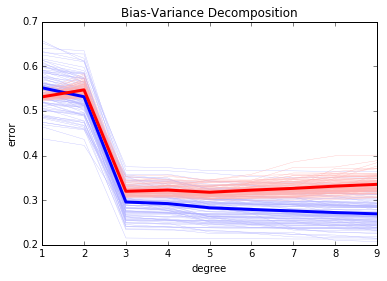

In [27]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        train_x,train_y,test_x,test_y=split_data(x,y,ratio_train)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for index_degree, degree in enumerate(degrees):
            train_tx=build_poly(train_x,degree)
            test_tx=build_poly(test_x,degree)
            weights,mse=least_squares(train_y,train_tx)
            rmse_tr[index_seed,index_degree]=np.sqrt(2*mse)
            rmse_te[index_seed,index_degree]=np.sqrt(2*compute_mse(test_y,test_tx,weights))

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()